In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs import *
from sparse_rf.modules import make_X, make_A
from sparse_rf.util import *
from sparse_rf.util.polynomials import *
from functools import partial
import random
import gc

import sys

In [56]:
m = 1000
d = 5
q = 1
N = 10000
active = fourier

ratio_train = 0.7

In [57]:
def make_W(d, q, n=1, dist=normal):
    num_supports = comb(d, q)
    W = np.zeros((n*num_supports, d))
    inds = combinations(range(d), d-q)
    ds = set(range(d))
    inds_track = []
    for i in range(num_supports):
        ind = next(inds)
        inds_track.append(ds.difference(set(ind)))
        for j in range(n):
            w = dist(d)
            w[list(ind)] = 0
            W[i*n+j, :] = w
    return W, inds_track

In [58]:
X = make_X(d, m, dist=uniform)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

y = fn1(X.T)
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [59]:
W, inds = make_W(d, q, n=(N//comb(d, q)), dist=normal)
A_train = make_A(X_train, W, active=active)
A_test = make_A(X_test, W, active=active)

In [60]:
c = min_l2(A_train, y_train)
np.linalg.norm(A_test@c-y_test) / np.linalg.norm(y_test)

0.0002472698862440916

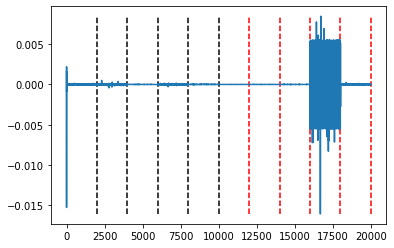

In [61]:
plt.plot(c)
for i in range(len(inds)):
    plt.vlines((len(c)//(2*len(inds)))*(i+1), min(c), max(c), color="black", linestyles="--")
for i in range(len(inds)):
    plt.vlines((len(c)//(2*len(inds)))*(i+len(inds)+1), min(c), max(c), color="red", linestyles="--")

In [55]:
inds

[{3, 4},
 {2, 4},
 {2, 3},
 {1, 4},
 {1, 3},
 {1, 2},
 {0, 4},
 {0, 3},
 {0, 2},
 {0, 1}]